## Generating random modern planets dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geexhp.core import datavis, datagen, geostages
datavis.configure_matplotlib()

In [2]:
dg = datagen.DataGen(url="http://127.0.0.1:3000/api.php")

Testing connection to PSG at http://127.0.0.1:3000/api.php ...
Connected to PSG with success.


In [3]:
dg.generator(1_000, random_atm=False, verbose=True, molweight=geostages.molweight_modern(), file="modern1k")

Gererating planets:: 100%|██████████| 1000/1000 [Remaining: 00:00, Elapsed: 3:50:33] 


Generation completed.


In [31]:
modern = pd.read_parquet("../data/modern1k.parquet")

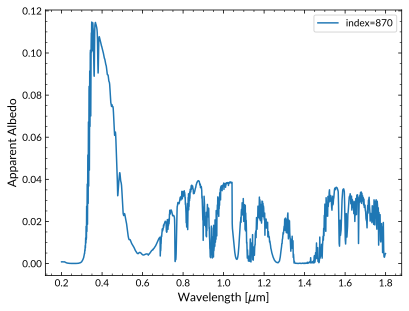

In [47]:
index = np.random.randint(0, len(modern))
datavis.plot_spectrum(modern, label=f"index={index}", index=index);

## Generating random after GOE and NOE planets dataset

In [3]:
dg_goe = datagen.DataGen(url="http://127.0.0.1:3000/api.php", stage="goe")

Testing connection to PSG at http://127.0.0.1:3000/api.php ...
Connected to PSG with success.


In [5]:
dg_goe.generator(100, random_atm=False, verbose=True, molweight=geostages.molweight_after_goe(), file="goe100")

Gererating planets:: 100%|██████████| 100/100 [Remaining: 00:00, Elapsed: 12:14]

Generation completed.


In [2]:
dg_noe = datagen.DataGen(url="http://127.0.0.1:3000/api.php", stage="noe")

Testing connection to PSG at http://127.0.0.1:3000/api.php ...
Connected to PSG with success.


In [3]:
dg_noe.generator(100, random_atm=False, verbose=True, molweight=geostages.molweight_after_noe(), file="noe100")

Gererating planets:: 100%|██████████| 100/100 [Remaining: 00:00, Elapsed: 12:10]

Generation completed.


In [48]:
goe = pd.read_parquet("../data/goe100.parquet")
noe = pd.read_parquet("../data/noe100.parquet")

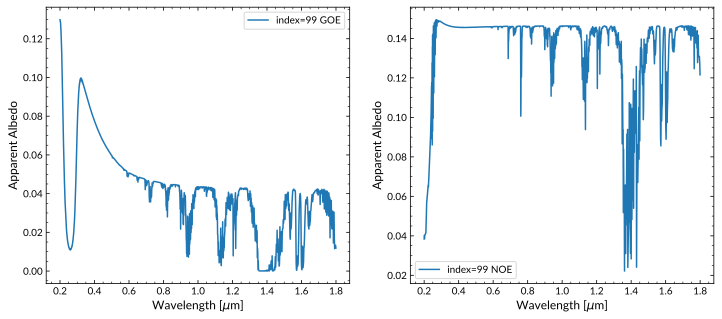

In [51]:
index = np.random.randint(0, len(goe))

_, ax = plt.subplots(1, 2, figsize=(12, 5))
datavis.plot_spectrum(goe, label=f"index={index} GOE", index=index, ax=ax[0])
datavis.plot_spectrum(noe, label=f"index={index} NOE", index=index, ax=ax[1]);

## Generating random planets with an isothermal profile

In [70]:
dg.generator(1_000, random_atm=True, verbose=True, file="random1k")

Gererating planets:: 100%|██████████| 1000/1000 [Remaining: 00:00, Elapsed: 3:03:26] 


Generation completed.


In [52]:
random = pd.read_parquet("../data/random1k.parquet")

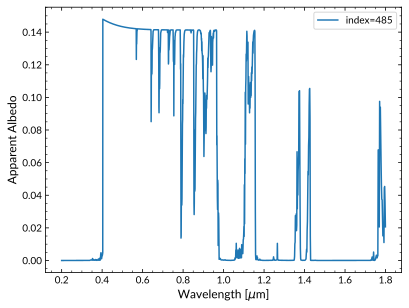

In [65]:
index = np.random.randint(0, len(random))
datavis.plot_spectrum(random, label=f"index={index}", index=index);